# SETEMBRO AMARELO: Análise da taxa de suicídio no Brasil (1985 - 2015)

![texto alternativo](https://s2.glbimg.com/olhH4G631cBvpx3Gk-_4vYzpYYA=/0x0:800x411/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2019/9/L/GMaDfOReifvGnloI03iA/setembro.jpg)

## Introdução

Émile Durkheim define o suicídio como “todo caso de morte que resulta de um ato executado pela própria vitima.” [1]. Ou seja, a própria pessoa tira sua vida.
O que costumamos observar em indivíduos que recorrem a esta atitude é a situação psicológica que o mesmo se encontra. A não recuperação de um trauma, seja ele recente ou não; a perda recente de algum ente querido são exemplos de fatores que influenciam muito a pessoa na escolha de por um fim no que está vivendo.

  O setembro amarelo foi criado em 2014, com o intuito de ajudar na prevenção do suicídio através de campanhas midiáticas, para que esse assunto traga a população para mais perto, a fim de pensar no problema.  Afinal, falar sobre esse esse ato extremo torna-se cada vez mais necessário, já que os casos vem aumentando nos últimos anos.

  A depressão vem sendo apontada como a grande vilã dessa história. Logo, é de primordial importância a identificação e o tratamento dessa doença, de preferencia nos estágios ainda inicias. Contudo, devido a falta de informação, as pessoas ainda tratam essa doença como uma "frescura", ignorando os seus sinais, e dessa forma agravando as suas consequências.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cor_genero = ['#F781D8', '#819FF7']

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/suicide_rates.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Primeira coisa que faremos é selecionar apenas os dados do Brasil

In [5]:
df_brasil = df[df['country']=='Brazil'].copy()
df_brasil.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [6]:
df_brasil.shape

(372, 12)

In [7]:
print('Mundo------------')
display(df.isnull().sum())
print('Brasil----------')
display(df_brasil.isnull().sum())


Mundo------------


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Brasil----------


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

## Média de suicídio no Brasil X no mundo

---
Primeiro faremos uma análise comparativa da média de suicídios no Brasil x no mundo. É importante verificar a tendência ao longo do tempo, para termos um diagnóstico geral sobre o comportamento da variável.

''

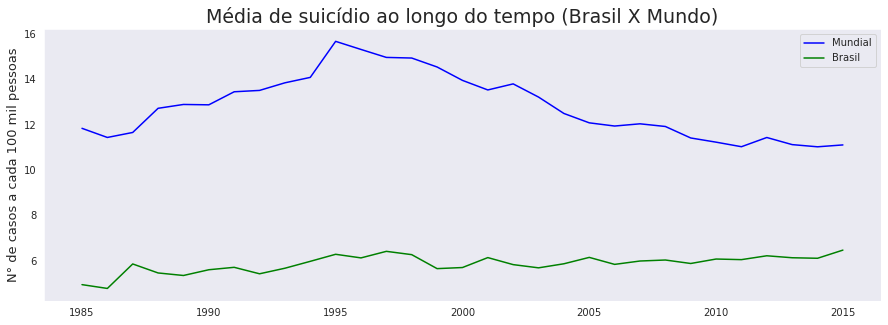

In [8]:
#Pegar a média mundialç e do Brasil em suicídios
anos = df_brasil.year.unique()
suicidio_brasil_media = df_brasil.groupby('year')['suicides/100k pop'].mean()
suicidio_mundial_media = df.groupby('year')['suicides/100k pop'].mean()
gdp_media_mundo = df.groupby('year')['gdp_per_capita ($)'].mean()
gdp_media_brasil = df_brasil.groupby('year')['gdp_per_capita ($)'].mean()

suicidio_mundial_media.drop(2016, inplace=True)

fig = plt.figure(figsize=(15,5))
ax = sns.lineplot(x=anos,y=suicidio_mundial_media, label='Mundial', color='blue')
ax = sns.lineplot(x=anos, y = suicidio_brasil_media, label='Brasil', color='green')
plt.title('Média de suicídio ao longo do tempo (Brasil X Mundo)', fontsize=19)
plt.ylabel('N° de casos a cada 100 mil pessoas',fontsize=13)
;

Podemos observar que, a média de suicídio vem diminuindo desde 1995 no mundo, enquanto o Brasil continua com um crescimento (não muito alto) nessa média. E para entender melhor esse comportamento, seria mais viável um estudo da área de psicologia e/ou sociologia para entender melhor esse fenômeno e como o Brasil e os brasileiros estão se relacionando com ele. 

## Faixa etária

---

Para entendermos melhor quem são as pessoas que estamos estudando, podemos classificá-los por faixa etária. A faixa etária vai nos dar um panorama básico de quem comete suicídio.
O objetivo aqui é identificar qual a faixa etária que tem a maior representatividade entre aqueles que tiram a própria vida, e identificar se houve alguma mudança no perfil ao longo do período estudado

In [9]:
tabela = pd.pivot_table(df_brasil, values='suicides_no', index=['year'], columns=['age'])
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '+75 years']
tabela = tabela.reindex(column_order, axis=1)
tabela.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,+75 years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,NaN
1986,31.0,508.0,505.5,651.0,372.0,NaN
1987,33.5,502.0,565.5,724.5,422.0,NaN
1988,30.0,472.0,557.5,724.0,356.0,NaN
1989,31.5,491.5,569.0,692.5,354.5,NaN


In [10]:
tabela2 = pd.pivot_table(df_brasil, values ='suicides/100k pop',index=['sex'],columns=['year'])
tabela2 = tabela2.T

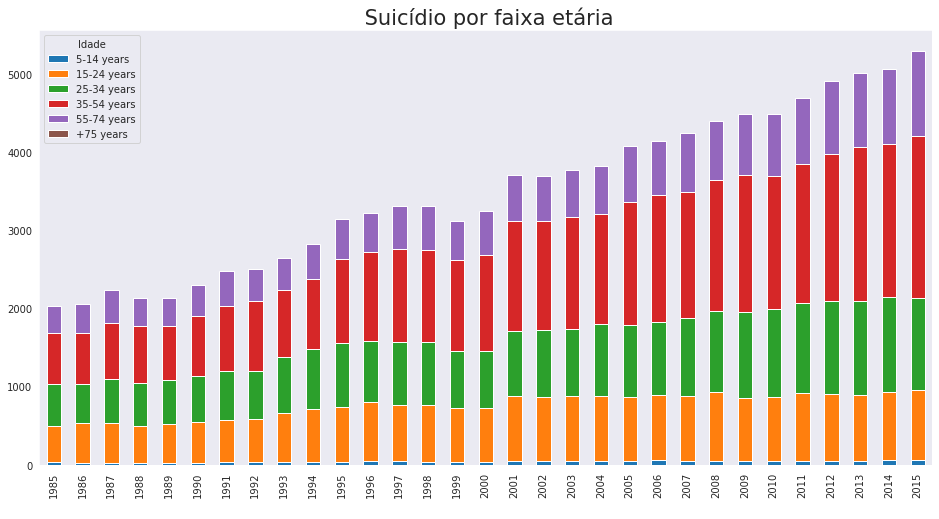

In [11]:
tabela.plot.bar(stacked=True,figsize=(16,8))
plt.legend(title='Idade')
plt.xlabel(' ')
plt.title(' Suicídio por faixa etária',fontsize=21);

In [12]:
df_brasil['generation'].value_counts().sum

<bound method Series.sum of Generation X       88
Silent             82
Millenials         72
Boomers            68
G.I. Generation    44
Generation Z       18
Name: generation, dtype: int64>

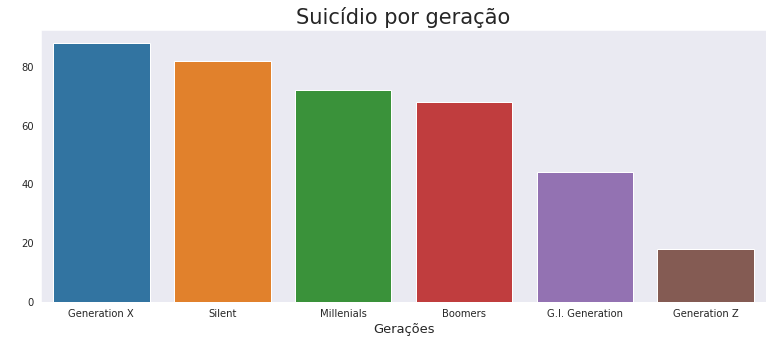

In [13]:
fig = plt.figure(figsize=(13,5))
sns.countplot('generation', order = df_brasil['generation'].value_counts().index, data = df_brasil)
plt.xlabel('Gerações', fontsize=13)
plt.ylabel(' ')
plt.title('Suicídio por geração',fontsize=21);

Entendendo a faixa etária podemos direcionar nossa mensagem de forma mais eficiente, pois daremos um foco a quem mais é afetado. Como fazer isso? Intensificando campanhas e debates nos locais onde essas pessoas costumam frequentar.

## Gênero

---
Outra característica interessante é o gênero. Entender a diferença dos gêneros na tendeência ao suicídio pode, novamente, nos ajudar a direcionar o foco da mensagem, além de entender alguns padrões sociais


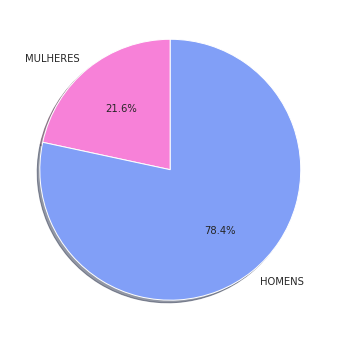

In [14]:
generos = df_brasil.groupby('sex').suicides_no.sum() / df_brasil.groupby('sex').suicides_no.sum().sum()

fig = plt.figure(figsize=(6,6))
plt.pie(generos, labels=['MULHERES', 'HOMENS'], colors = cor_genero, autopct='%1.1f%%', shadow = True, startangle=90);

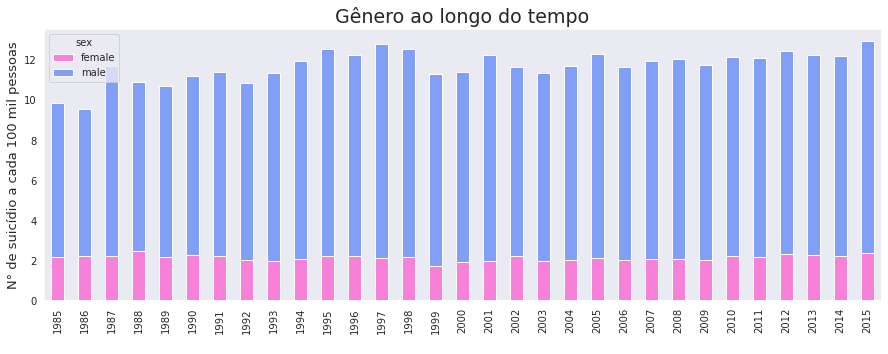

In [15]:
tabela2.plot.bar(stacked=True, figsize=(15,5), color=cor_genero)
plt.xlabel(' ')
plt.title('Gênero ao longo do tempo', fontsize=19)
plt.ylabel('N° de suicídio a cada 100 mil pessoas', fontsize=13);

## Faixa etária pelo número total de mortes

In [16]:
mulheres = df.groupby(['sex', 'age'])['suicides_no'].sum()[:6] # sexo e idade --> numero de suicidios --> somar e pegar os 6 primeiros
homens = df.groupby(['sex', 'age'])['suicides_no'].sum()[6:] # sexo e idade --> numero de suicidios --> somar e pegar os 6 ultimos
m = [] # Mulheres
h = [] # Homens
mn = [] # Numero de mulheres
hn = [] # Numero de homens
for i in range(6):
  m.append(mulheres.index[i][1].split(' ')[0])
  h.append(homens.index[i][1].split(' ')[0])
  mn.append(mulheres[i])
  hn.append(homens[i])


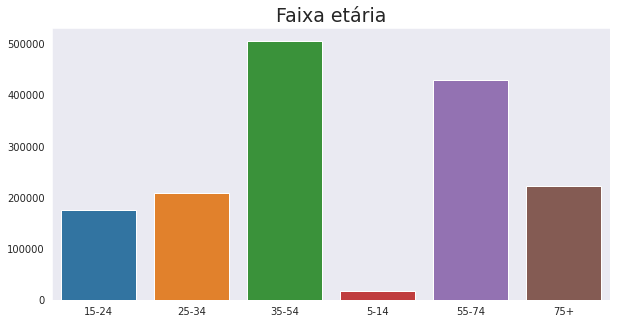

In [17]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=m, y = mn, data=df_brasil)
plt.title('Faixa etária', fontsize=19);

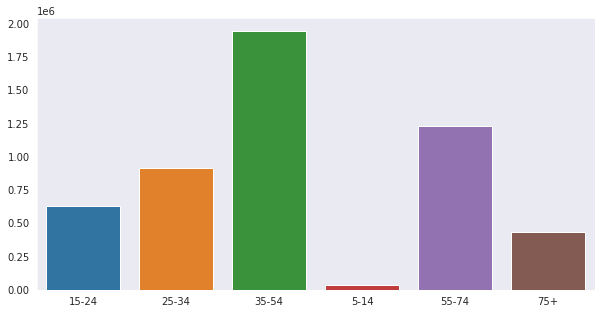

In [18]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=h, y = hn, data=df_brasil);

In [19]:
print(f'''
Total de homens: {sum(hn)}
Total de mulheres: {sum(mn)}
''')


Total de homens: 5188910
Total de mulheres: 1559510



Agora que sabemos gfaixa etária e gênero, podemos direcionar ainda melhor nossa mensagem

## Dados econômicos

---
Por último, as análises econômicas são importantes fatores, pois com elas podemos ver se algumas variáveis influenciam ou se não fazem diferença no suicídio


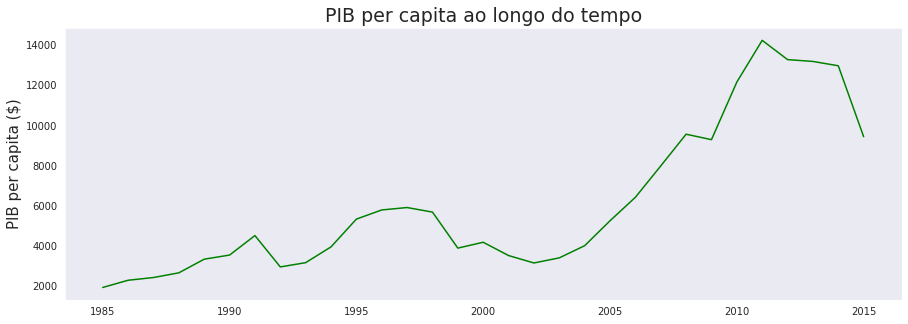

In [20]:

fig = plt.figure(figsize=(15,5))
ax = sns.lineplot(x=anos,y=gdp_media_brasil, color = 'green')
plt.ylabel('PIB per capita ($)', fontsize=15)
plt.title('PIB per capita ao longo do tempo',fontsize=19);

''

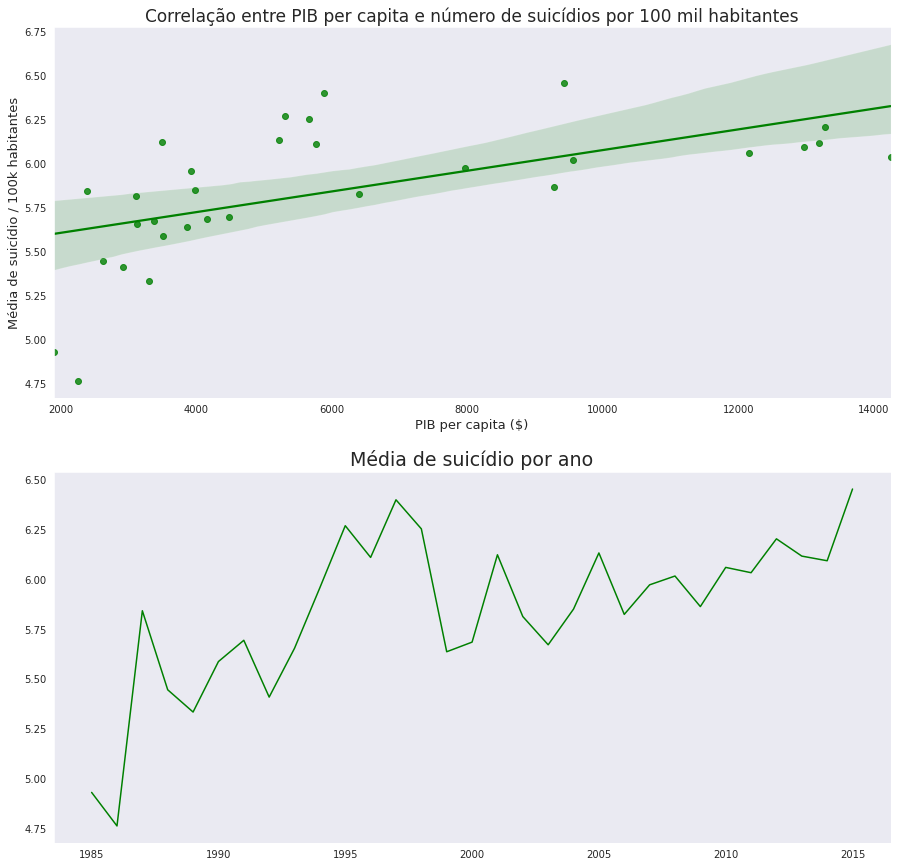

In [32]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,1,1)
sns.regplot(x=gdp_media_brasil, y =suicidio_brasil_media, data=df_brasil, color='green')
plt.title('Correlação entre PIB per capita e número de suicídios por 100 mil habitantes',fontsize=17)
plt.ylabel('Média de suicídio / 100k habitantes', fontsize=13)
plt.xlabel('PIB per capita ($)',fontsize=13)

ax2 = fig.add_subplot(2,1,2)
sns.lineplot(x=anos, y =suicidio_brasil_media, color = 'green')
plt.title('Média de suicídio por ano', fontsize=19)
plt.ylabel(' ')
;

## Referências bibliográficas:
**De Vares S. F, (2007)**. O problema do suicídio em Émile Durkheim
 